# Influence of Weather on the bixit system

The purpose of this notebook is to try to make correlation and draw conclusion between weather factors and bike use. We'll try to suppress other factors (such as increasing popularity of bikeshare, increasing number of bike, season's influence on people's mind, ...) as much as possible.

## Increasing popularity of the bixit system

Let's visualise the evolution of the utilisation of the bike

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import matplotlib.dates as mdates
import datetime

In [33]:
# loads the combined dataset
data = pd.read_pickle("../combined_data")
data.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,latitude_start,longitude_start,latitude_end,longitude_end,year,month,start_day,start_hour,end_day,end_hour,distance
0,2014-04-15 00:01:00,6209,2014-04-15 00:18:00,6436,1061,1,45.512520,-73.570620,45.486452,-73.595234,2014,4,15,0,15,0,3.475949
1,2014-04-15 00:01:00,6214,2014-04-15 00:11:00,6248,615,1,45.517350,-73.569060,45.518593,-73.581566,2014,4,15,0,15,0,0.984131
2,2014-04-15 00:01:00,6164,2014-04-15 00:18:00,6216,1031,1,45.532955,-73.584194,45.514960,-73.585030,2014,4,15,0,15,0,2.002019
3,2014-04-15 00:01:00,6214,2014-04-15 00:24:00,6082,1382,1,45.517350,-73.569060,45.550613,-73.582883,2014,4,15,0,15,0,3.852206
4,2014-04-15 00:02:00,6149,2014-04-15 00:08:00,6265,347,1,45.538670,-73.569360,45.539259,-73.577338,2014,4,15,0,15,0,0.624798


In [34]:
#to simplify, we take only the start day
df = data[['year','month','start_day']]
df.year = df.year.map(str) + '-' + df.month.map(str) + '-' + df.start_day.map(str)
df = df.rename(columns={'year': 'date'})
df = df[['date']]

#Number of biketravel per day
Daily_BikeTravel = df.groupby(['date']).size().reset_index(name='count')
Daily_BikeTravel.head()

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,count
0,2014-10-1,16110
1,2014-10-10,12676
2,2014-10-11,8772
3,2014-10-12,8666
4,2014-10-13,8165


In [35]:
# creation of the frequency column
Daily_BikeTravel.max()

date     2019-9-9
count       42878
dtype: object

In [36]:
Daily_BikeTravel["frequency"] = Daily_BikeTravel["count"] / 42878
Daily_BikeTravel.head()

,date,count,frequency
0,2014-10-1,16110,0.375717
1,2014-10-10,12676,0.295629
2,2014-10-11,8772,0.204580
3,2014-10-12,8666,0.202108
4,2014-10-13,8165,0.190424


We plot the evolution of bike use in year 2018

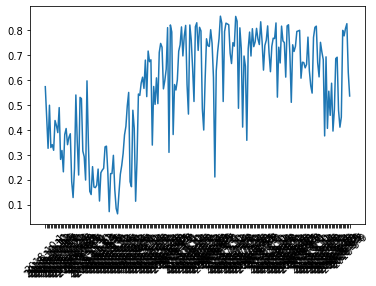

In [37]:
year_2018 = Daily_BikeTravel['date'].astype(str).str.startswith('2018')
Daily_BikeTravel_2018 = Daily_BikeTravel[year_2018]
plt.plot(Daily_BikeTravel_2018['date'],Daily_BikeTravel_2018['frequency'])
plt.xticks(rotation = 45);

## Increasing popularity round 2

In [ ]:
# too many data to plot everything per day for one year
# If I truly want to evaluate the evolution of bike use in function of time I should count over year or month maybe

# If I want the influence of season I can count over 2 or 3 month
# I can do the two in one shot

In [ ]:
# Number of biketravel per month

## The wheather dataset

In [2]:
weather_2014 = pd.read_csv(r"WeatherData\2014.csv",sep = ',')
weather_2015 = pd.read_csv(r"WeatherData\2015.csv",sep = ',')
weather_2016 = pd.read_csv(r"WeatherData\2016.csv",sep = ',')
weather_2017 = pd.read_csv(r"WeatherData\2017.csv",sep = ',')
weather_2018 = pd.read_csv(r"WeatherData\2018.csv",sep = ',')
weather_2019 = pd.read_csv(r"WeatherData\2019.csv",sep = ',')

data = pd.concat([weather_2014,weather_2015,weather_2016,weather_2017,weather_2018,weather_2019])
data.head()

,Longitude (x),Latitude (y),Nom de la Station,ID climatologique,Date/Heure,Année,Mois,Jour,Qualité des Données,Temp max.(°C),...,Neige tot. (cm),Neige tot. Indicateur,Précip. tot. (mm),Précip. tot. Indicateur,Neige au sol (cm),Neige au sol Indicateur,Dir. raf. max. (10s deg),Dir. raf. max. Indicateur,Vit. raf. max. (km/h),Vit. raf. max. Indicateur
0,"-73,58","45,50",MCTAVISH,7024745,2014-01-01,2014,1,1,NaN,"-15,2",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
1,"-73,58","45,50",MCTAVISH,7024745,2014-01-02,2014,1,2,NaN,"-22,3",...,NaN,M,"0,0",NaN,NaN,NaN,3.0,NaN,37,NaN
2,"-73,58","45,50",MCTAVISH,7024745,2014-01-03,2014,1,3,NaN,"-19,0",...,NaN,M,"1,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
3,"-73,58","45,50",MCTAVISH,7024745,2014-01-04,2014,1,4,NaN,"-6,6",...,NaN,M,"0,0",NaN,NaN,NaN,NaN,NaN,<31,NaN
4,"-73,58","45,50",MCTAVISH,7024745,2014-01-05,2014,1,5,NaN,"0,2",...,NaN,M,"8,0",NaN,NaN,NaN,NaN,NaN,<31,NaN


In [3]:
#select the useful columns
df_weather = data[['Date/Heure','Temp moy.(°C)','Précip. tot. (mm)', 'Neige au sol (cm)', 'Vit. raf. max. (km/h)']]
df_weather.rename(columns={'Date/Heure': 'Date', 'Temp moy.(°C)': 'Mean temp (°C)',
                           'Précip. tot. (mm)': 'Total precip (mm)', 'Neige au sol (cm)': 'Snow on ground (cm)',
                           'Vit. raf. max. (km/h)': 'Wind max speed (km/h)'}, inplace=True)

C:\Users\Ariane Acer\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [4]:
df_weather.head()

,Date,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,2014-01-01,"-19,6","0,0",NaN,<31
1,2014-01-02,"-24,9","0,0",NaN,37
2,2014-01-03,"-21,3","1,0",NaN,<31
3,2014-01-04,"-14,0","0,0",NaN,<31
4,2014-01-05,"-5,2","8,0",NaN,<31


In [10]:
Weather_Freq = pd.merge(Daily_BikeTravel, df_weather, how='inner', on=None, left_on='date', right_on='Date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
Weather_Freq.drop(['Date'],axis='columns', inplace=True)
Weather_Freq.head()

,date,count,frequency,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
0,2014-10-10,12676,0.295629,"9,2","0,0",NaN,<31
1,2014-10-11,8772,0.204580,"9,4","0,0",NaN,<31
2,2014-10-12,8666,0.202108,"9,6","0,0",NaN,<31
3,2014-10-13,8165,0.190424,"12,1","0,0",NaN,<31
4,2014-10-14,15513,0.361794,"19,2","0,0",NaN,<31


In [11]:
#plot de octobre 2018
October_2018 = Weather_Freq['date'].astype(str).str.startswith('2018-10')
Weather_Freq_Oct2018 = Weather_Freq[October_2018]
Weather_Freq_Oct2018.head()

,date,count,frequency,Mean temp (°C),Total precip (mm),Snow on ground (cm),Wind max speed (km/h)
112,2018-10-10,19334,0.450907,"14,9","5,7",NaN,32
113,2018-10-11,13942,0.325155,"8,7","8,1",NaN,NaN
114,2018-10-12,21349,0.497901,"8,5","0,3",NaN,NaN
115,2018-10-13,14078,0.328327,"6,3","0,0",NaN,NaN
116,2018-10-14,14576,0.339941,"8,1","0,3",NaN,NaN
